## 선형 회귀 실습

In [3]:
!pip install scikit-learn
import sklearn

sklearn.__version__

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------- ----------------------- 4.7/11.1 MB 23.8 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.1 MB 22.4 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 22.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------------------- -------------------- 6.0/12.6 MB 30.7 MB/s eta 0:00:01
   ------------------------------------- -- 11.8/12.6 MB 28.3 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 27.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   ----- ---------------------------------- 5.5/43.6 MB 27.9 MB/s eta 0:00:02
   --------- ------------------------------ 10.7/43.6 MB 25.8 MB/s eta 0:00:02
   ------------- -------------------------- 15.2/43.6 MB 24.5 MB/s eta 0:00:02
   --

'1.6.1'

### 방어 데이터 


In [50]:
bream_length = [
    25.4,
    26.3,
    26.5,
    29.0,
    29.0,
    29.7,
    29.7,
    30.0,
    30.0,
    30.7,
    31.0,
    31.0,
    31.5,
    32.0,
    32.0,
    32.0,
    33.0,
    33.0,
    33.5,
    33.5,
    34.0,
    34.0,
    34.5,
    35.0,
    35.0,
    35.0,
    35.0,
    36.0,
    36.0,
    37.0,
    38.5,
    38.5,
    39.5,
    41.0,
    41.0,
]
bream_weight = [
    242.0,
    290.0,
    340.0,
    363.0,
    430.0,
    450.0,
    500.0,
    390.0,
    450.0,
    500.0,
    475.0,
    500.0,
    500.0,
    340.0,
    600.0,
    600.0,
    700.0,
    700.0,
    610.0,
    650.0,
    575.0,
    685.0,
    620.0,
    680.0,
    700.0,
    725.0,
    720.0,
    714.0,
    850.0,
    1000.0,
    920.0,
    955.0,
    925.0,
    975.0,
    950.0,
]

In [54]:
print(len(bream_length))

35


### 패키지 다운 로드 matplotlib

matpolotlib은 그래프를 그리는 패키지 

In [6]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


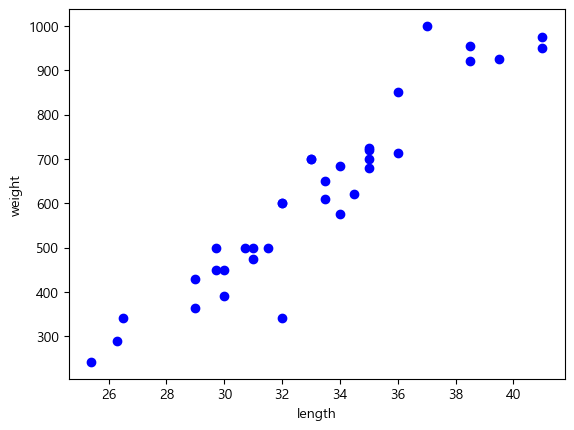

In [55]:
"""
도미 데이터
"""
import matplotlib.pyplot as plt
plt.scatter(
    bream_length, bream_weight, color="blue", marker="o"
)  # scatter는 산점도를 그리는 함수
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [10]:
"""
방어 데이터
"""
smelt_length = [
    9.8,
    10.5,
    10.6,
    11.0,
    11.2,
    11.3,
    11.8,
    11.8,
    12.0,
    12.2,
    12.4,
    13.0,
    14.3,
    15.0,
]
smelt_weight = [
    6.7,
    7.5,
    7.0,
    9.7,
    9.8,
    8.7,
    10.0,
    9.9,
    9.8,
    12.2,
    13.4,
    12.2,
    19.7,
    19.9,
]

C:\Users\zxcc9\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zxcc9\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zxcc9\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zxcc9\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\zxcc9\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45936

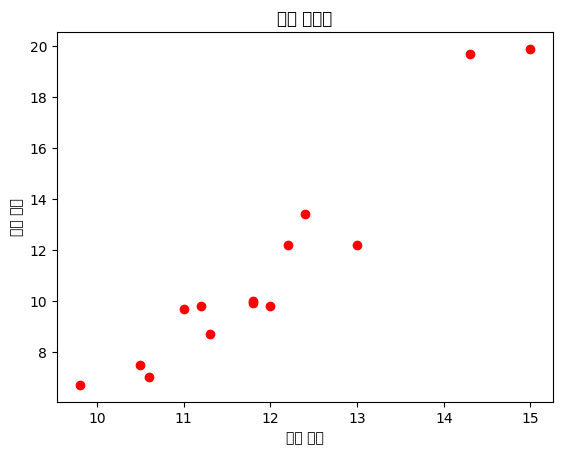

In [15]:
plt.scatter(smelt_length, smelt_weight,color='red',marker='o')
plt.xlabel('방어 길이')
plt.ylabel('방어 무게')
plt.title('방어 데이터')
plt.show()

### 도미와 방어 데이터를 합쳐서 보자. 

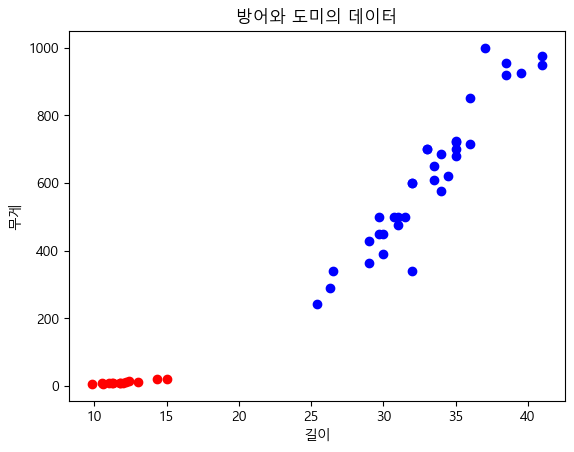

In [56]:
import matplotlib.font_manager as fm


plt.rc("font", family="Malgun Gothic") ## 한글 폰트 적용
plt.rcParams["axes.unicode_minus"] = False
plt.scatter(bream_length,bream_weight,color='blue')
plt.scatter(smelt_length,smelt_weight,color='red')
plt.xlabel('길이')
plt.ylabel('무게')
plt.title('방어와 도미의 데이터')
plt.show()

### k-최근접 이웃 알고리즘 

- 가장 가까운 K개의 데이터를 찾아 다수결 또는 평균을 통해 분류 또는 회귀를 수행하는 알고리즘 
- 지도 학습 알고리즘 
- 학습 과정이 거의 없고, 예측 시 계산이 많음 ( lazy learning )
- k값 ( 이웃 개수 )에 따라 결과가 달라짐. 

In [58]:
print(len(bream_length))
length=bream_length+smelt_length
weight=bream_weight+smelt_weight

35


### 사이킷 런 패키지 

- 지도 학습, 비지도 학습, 데이터 전처리, 모델 평가 등 다양한 기능을 지원 
- 선형회귀, knn, 랜덤 포레스트 등 여러 알고리즘 사용 가능 

In [59]:
fish_data = [[l,w] for l , w in zip(length,weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


### zip 함수 

여러개의 리스트를 묶어서 튜플의 형태로 반환하는 내장 함수 

- 같은 인덱스의 요소끼리 묶어서 튜플을 생성 
- for 루프와 함께 자주 사용됨
- 결과는 zip 객체이므로 list()나 tuple()로 변환 가능 

In [60]:
"""zip 함수 간단 예제"""

list1=[1,2,3]
list2=['하나','둘','셋']


zipped_data = [[x,y] for x,y in zip(list1,list2)]
print(zipped_data)

[[1, '하나'], [2, '둘'], [3, '셋']]


### 방어와 도미의 계산식 만들기 

다시 예제로 돌아가서, 현재, 도미와 방어의 데이터는 2차원 배열로 되어 있고, 각 원소마다, 
도미, 방어 순으로 데이터가 표시된다. 
또한, 도미를 1로, 방어를 0으로 생각한다. 
그럼, 도미와 방어의 데이터를 1과0으로 나타내려면, 도미는 35개의 데이터, 방어는 14개의 데이터가 있으므로, 

In [43]:
# 어떤 것이 도미이고, 어떠한 것이 도미인지 알려주는 정답은 아래와 같이 만들 수 있다. 
fish_target = [1] * 35 + [0] * 14 
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


이제 사이킷런 패키지에서 k-최근접 이웃 알고리즘을 구현한 KneighborsClassifier를 임포트 해보자.



In [67]:
import sklearn
from sklearn import neighbors


## 임포트한 KneighborsClassifier 객체를 만들자. 

kn = neighbors.KNeighborsClassifier()
kn.fit(fish_data,fish_target) # 모델 학습 
kn.score(fish_data,fish_target) # 훈련데이터로 평가를 하면, 정확도가 100이 나옴

### 새로운 데이터 예측 

print(kn.predict([[30,600],[15,20]])) ## 1이라고 출력되었으므로, 도미라고 판단 

## 분류모델이기 때문에, 예측을 수행하면, 정수값으로 나온다. 


## kn 인스턴스에는 도미와 방어 데이터가 모두 들어가 있다. 

print(kn._fit_X)
print(kn._y)


[1 0]
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


최근접 이웃 알고리즘은, 새로운 데이터에 대해 예측할 때는 가장 가까운 직선거리에 어떤 데이터가 있는지를 살피기만 하면된다. 단점은, k-최근접 이웃 알고리즘의 이러한 특성 때문에, 데이터가 아주 많은 경우, 사용하기 어렵다. 

-> 즉, fir() 메서드에 도미와 방어 데이터를 모두 들고 있다가, 새로운 데이터가 등장하면 가장 가까운 데이터를 참고하여, 도미인지 방어인지 구분한다. 